In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# 1. data preparation

## *a*. Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

b. Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.

In [ ]:
# jumlah data yang duplicate
df.duplicated().sum()

723

In [ ]:
# Mencari data yang duplikat
duplicate_rows = df[df.duplicated()]

# Menampilkan data yang duplikat
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


3. Outlier: Memeriksa outlier dan menangani outlier jika ada.

In [ ]:
#MENENTUKAN DAFTAR FITUR NUMERIK

list_numerik_features = ['trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
# menjumlahkan yang terindikasi outliers
Q1 = df[list_numerik_features].quantile(0.25)
Q3 = df[list_numerik_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[list_numerik_features] < (Q1 - 1.5 * IQR)) | (df[list_numerik_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

trestbps    30
chol        16
thalach      4
oldpeak      7
dtype: int64

In [ ]:
# handling outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = ['trestbps', 'chol', 'thalach', 'oldpeak']
for column in columns_with_outliers:
    handle_outliers_iqr(df, column)

# Cetak DataFrame setelah outlier ditanganid
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0,2,1
1021,60,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1,3,0
1022,47,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2,0
1023,50,0,0,110.0,254.0,0,0,159.0,0,0.0,2,0,2,1


4. Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.

In [ ]:
#() menjulmlahkan nilai pada column target
df.target.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64>

<Axes: ylabel='target'>

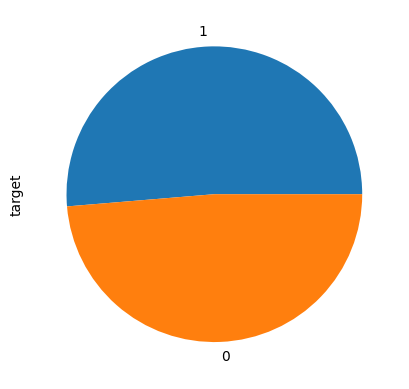

In [ ]:
# memvisualkan menggunkan pie chart
df.target.value_counts().plot(kind ='pie')

5. Feature encoding: Melakukan feature encoding jika diperlukan.

In [ ]:
# Melakukan one-hot encoding pada fitur-fitur kategorikal tertentu
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)


# Melihat DataFrame yang sudah diencode
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125.0,212.0,0,168.0,0,1.0,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140.0,203.0,1,155.0,1,3.1,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145.0,174.0,0,125.0,1,2.6,0,0,0,0,0,0,1,0,0,0,1
3,61,1,148.0,203.0,0,161.0,0,0.0,2,1,0,0,0,0,1,0,0,0,1
4,62,0,138.0,294.0,1,106.0,0,1.9,1,3,0,0,0,0,1,0,0,1,0


# 2. Exploratory Data Analysis (EDA)

1.  Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

2. Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.260488,16.532208,94.0,120.0,130.0,140.0,170.0
chol,1025.0,244.981463,47.746162,126.0,211.0,240.0,275.0,371.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.153171,22.881210,81.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.062244,1.141865,0.0,0.0,0.8,1.8,4.5


3. Menemukan dan mendeskripsikan statistical five summaries

4. Mendeskripsikan distribusi data

JAWABAN

In [ ]:
# Memilih fitur

features_for_EDA = ["age", "trestbps", "chol", "thalach", "oldpeak"]

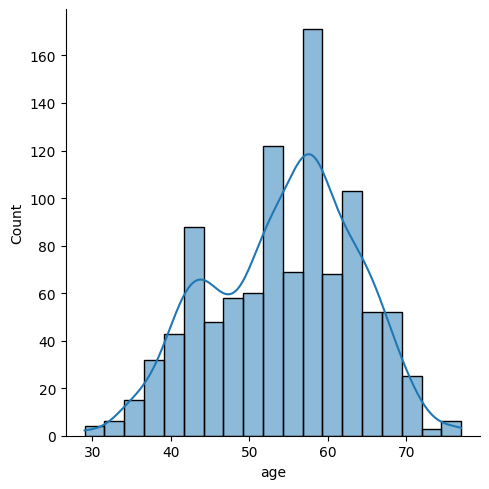

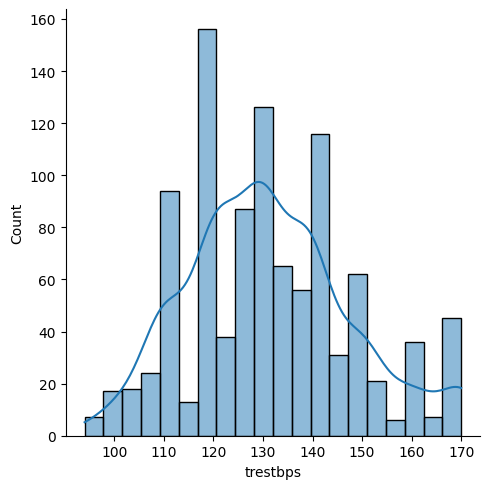

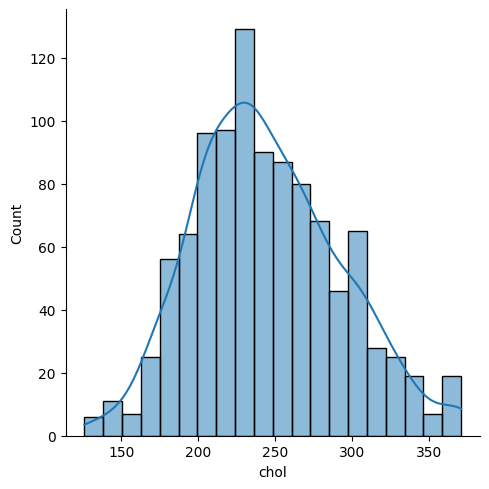

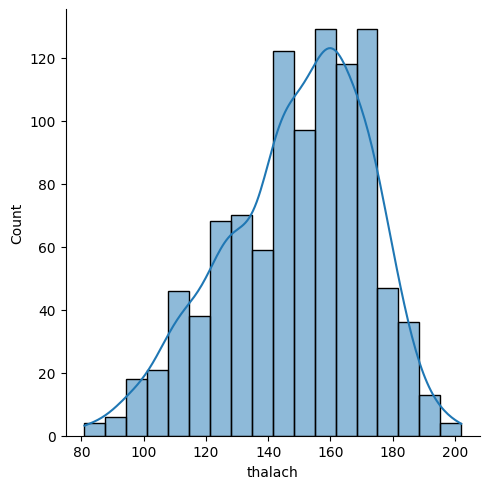

In [ ]:
#0VISUALISASI DISTRIBUSI DALAM FITUR-FITUR TERPILIH YANG TIDAK TERMASUK NILAI-NILAI kategorikal

for feature in features_for_EDA[:-1]:
*    sns.displot(df[feature], kde = True)

### Informasi yang dapat ditarik dari distribusi data:

#    *Usia: Pasien rata-rata berusia 54 tahun, menunjukkan bahwa dataset ini mungkin berfokus pada populasi yang lebih tua.
#    *Tekanan darah: Tekanan darah istirahat rata-rata sedikit di atas batas normal (120/80 mmHg), menunjukkan bahwa beberapa pasien mungkin memiliki hipertensi.
#    Kolesterol: Kadar kolesterol rata-rata sedikit di atas batas normal (200 mg/dl), menunjukkan bahwa beberapa pasien mungkin memiliki hiperkolesterolemia.
#    Denyut jantung: Denyut jantung rata-rata yang dicapai selama tes stres tergolong normal.
#    Depresi ST: Mayoritas pasien tidak mengalami depresi ST yang signifikan selama berolahraga, namun ada beberapa outlier yang perlu diperhatikan.


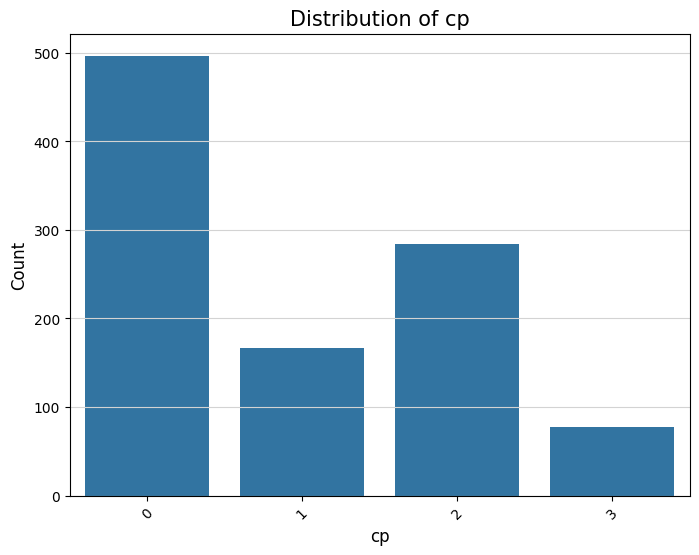

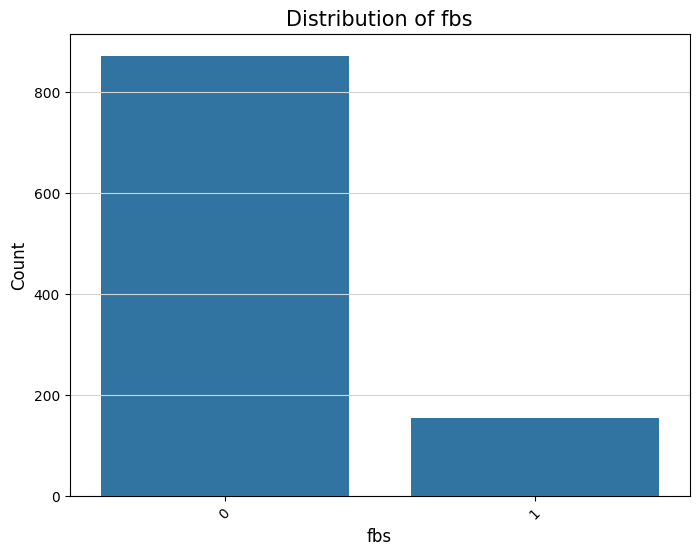

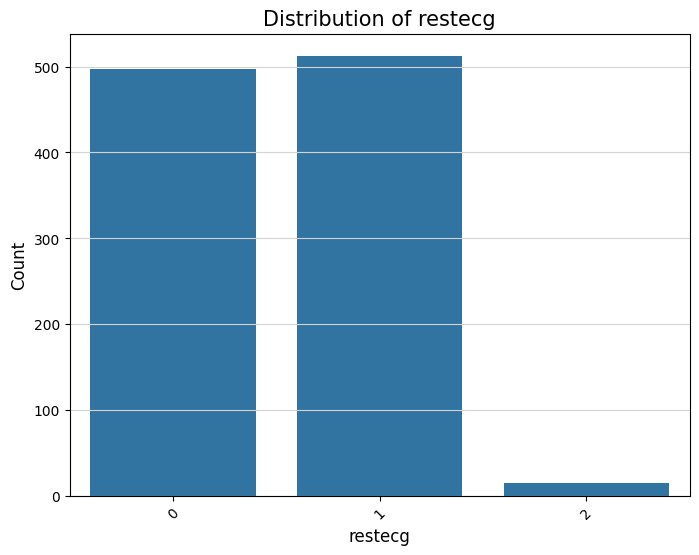

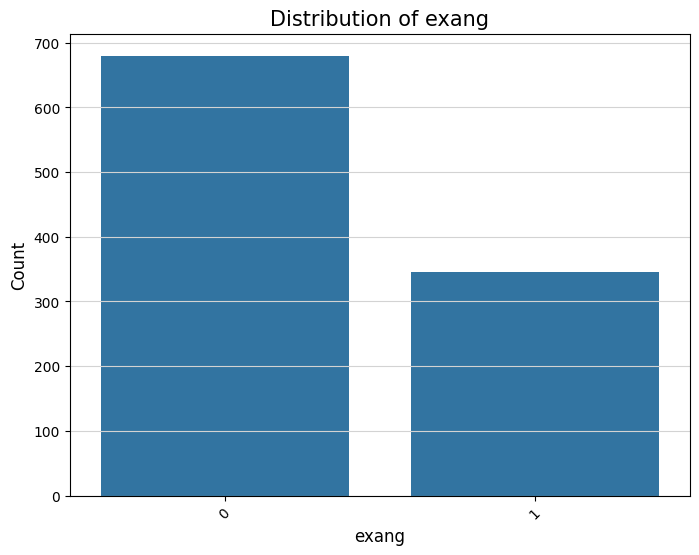

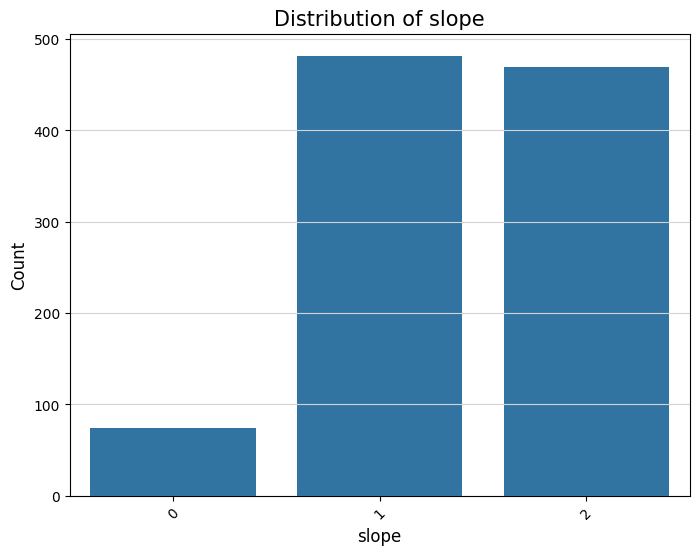

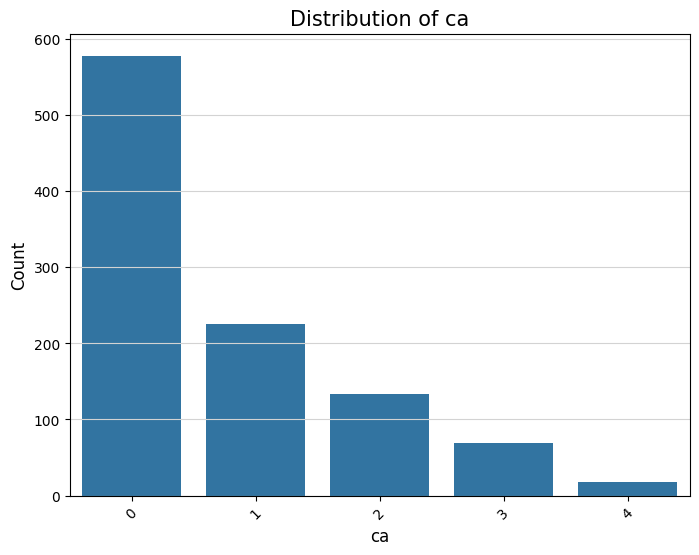

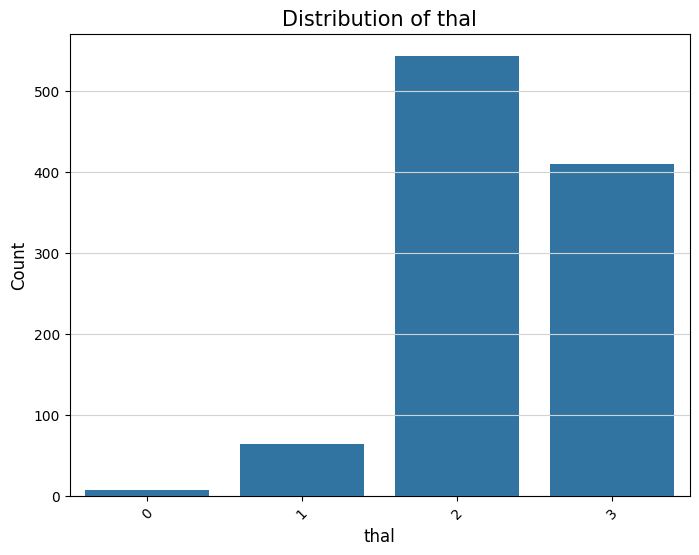

In [ ]:
# Membuat plot untuk setiap fitur kategorikal
categorical_features = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title('Distribution of ' + feature, fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', color='lightgrey')
    plt.show()

Insight:

* gender (Jenis kelamin): Dataset ini didominasi oleh perempuan, yang merupakan mayoritas yang signifikan.
* cp (Jenis Nyeri Dada): Dataset menunjukkan jenis nyeri dada yang bervariasi di antara pasien. Tipe 0 (Angina tipikal) tampaknya menjadi yang paling umum.
* fbs (Gula Darah Puasa): Sebagian besar pasien memiliki kadar gula darah puasa di bawah 120 mg/dl, yang menunjukkan bahwa gula darah tinggi bukanlah kondisi yang umum.
* restecg (Hasil Elektrokardiografi Istirahat): Hasil menunjukkan hasil elektrokardiografi istirahat yang bervariasi, dengan jenis tertentu yang lebih umum daripada yang lain. Distribusi yang tepat dapat diukur dari plot.
* exang (Angina yang Dipicu oleh Olahraga): Mayoritas pasien tidak mengalami angina akibat olahraga, yang menunjukkan bahwa hal ini mungkin bukan merupakan gejala yang umum di antara pasien.
* slopeK (emiringan Segmen ST Latihan Puncak): Dataset ini menunjukkan kemiringan yang berbeda dari segmen ST latihan puncak. Jenis tertentu mungkin lebih umum.
* ca (Jumlah Pembuluh Darah Utama yang Diwarnai oleh Fluoroskopi): Sebagian besar pasien memiliki lebih sedikit pembuluh darah utama yang diwarnai oleh fluoroskopi, dengan '0' menjadi yang paling sering.
* thal (Hasil Tes Stres Thalium): Kumpulan data menampilkan berbagai hasil uji stres thalium. Satu jenis tertentu tampaknya lebih lazim.
* Keberadaan Penyakit Jantung (target): Dataset ini hampir seimbang dalam hal keberadaan penyakit jantung, dengan sekitar 54,5% memilikinya dan 45,5% tidak memilikinya.

<Axes: >

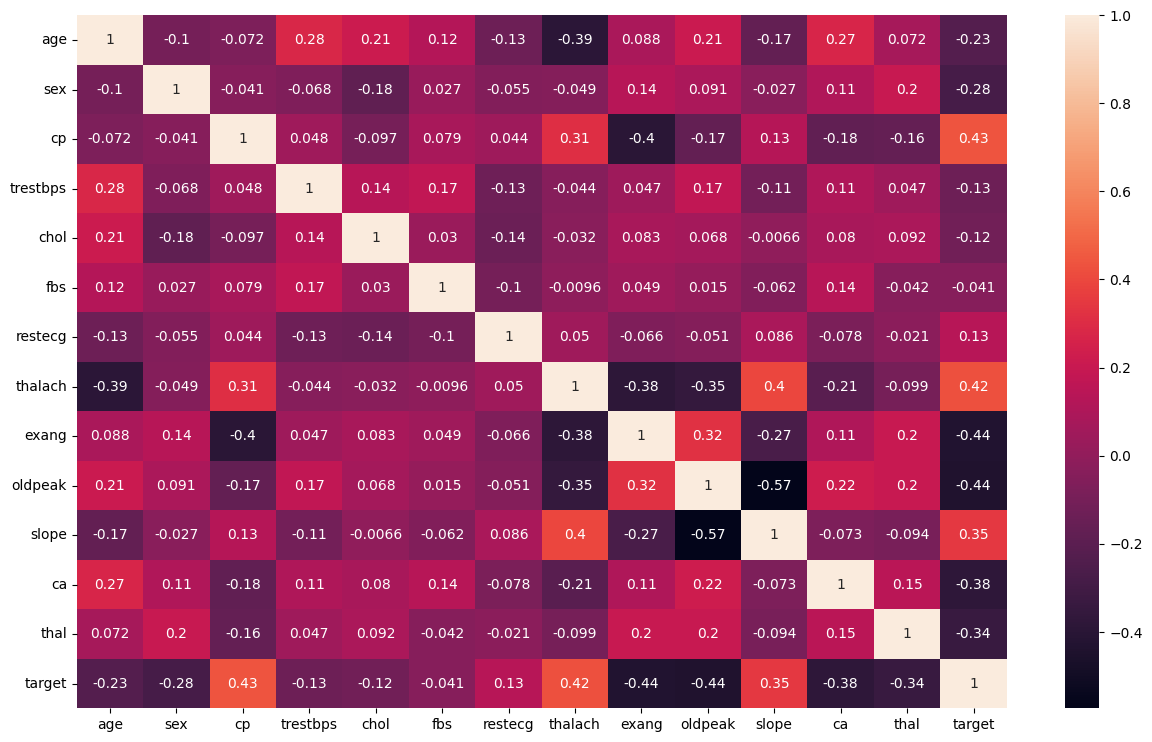

In [ ]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

Insight:

* Korelasi positif antara fitur target dan cp menunjukkan bahwa ada hubungan searah antara kedua fitur tersebut. Artinya, ketika nilai cp (jenis nyeri dada) cenderung meningkat, kemungkinan pasien memiliki penyakit jantung (nilai target = 1) juga cenderung meningkat.

* Korelasi negatif antara oldpeak dan slope Artinya, ketika nilai oldpeak cenderung meningkat (misalnya, nilai depresi ST yang lebih tinggi), maka nilai slope cenderung menurun (misalnya, kemiringan segmen latihan ST yang lebih datar).

# 3 Feature Engineering

**Feature Construction**

Create new Features with domain knowledge

1. Cholesterol Levels
2. thal_category
3. restecg_category

Encoding Categorical Column (Nominal Categorical)

In [ ]:
data_fc=df.copy() #membuat salinan dataframe untuk eksperimen

In [ ]:
# Transformasi fitur 'restecg' menjadi kategori baru
data_fc["Cholesterol Levels"] = data_fc["cp"].map({0: "total_chol_group", 1: "hdl_group", 2: "ldl_group"})
# Transformasi fitur 'restecg' menjadi kategori baru
data_fc["thal_category"] = data_fc["thal"].map({0: "Normal", 1: "Fixed defect", 2: "Reversible defect", 3: "Not described"})
# Transformasi fitur 'restecg' menjadi kategori baru
data_fc["restecg_category"] = data_fc["restecg"].map({0: "Normal", 1: "ST-T Abnormality", 2: "Left Ventricular Hypertrophy"})
data_fc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category,thal_category,restecg_category,age_group,]Cholesterol Levels,Cholesterol Levels
0,-0.268437,1,0,-0.378869,-0.691104,0,1,0.824084,0,-0.054537,2,2,3,0,typical angina,Not described,ST-T Abnormality,Dewasa Muda (18-59),total_chol_group,total_chol_group
1,-0.158157,1,0,0.528894,-0.879693,1,0,0.255654,1,1.785457,0,0,3,0,typical angina,Not described,Normal,Dewasa Muda (18-59),total_chol_group,total_chol_group
2,1.716595,1,0,0.831481,-1.487368,0,1,-1.056105,1,1.347363,0,0,3,0,typical angina,Not described,ST-T Abnormality,Dewasa Muda (18-59),total_chol_group,total_chol_group
3,0.724079,1,0,1.013034,-0.879693,0,1,0.518006,0,-0.930725,2,1,3,0,typical angina,Not described,ST-T Abnormality,Dewasa Muda (18-59),total_chol_group,total_chol_group
4,0.834359,0,0,0.407859,1.027150,1,1,-1.886886,0,0.734031,1,3,2,0,typical angina,Reversible defect,ST-T Abnormality,Dewasa Muda (18-59),total_chol_group,total_chol_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.528894,-0.502515,0,1,0.649182,1,-0.930725,2,0,2,1,atypical angina,Reversible defect,ST-T Abnormality,Dewasa Muda (18-59),hdl_group,hdl_group
1021,0.613800,1,0,-0.378869,0.272795,0,0,-0.356500,1,1.522600,1,1,3,0,typical angina,Not described,Normal,Dewasa Muda (18-59),total_chol_group,total_chol_group
1022,-0.819834,1,0,-1.286632,0.629018,0,0,-1.362182,1,-0.054537,1,1,2,0,typical angina,Reversible defect,Normal,Dewasa Muda (18-59),total_chol_group,total_chol_group
1023,-0.488996,0,0,-1.286632,0.188977,0,0,0.430556,0,-0.930725,2,0,2,1,typical angina,Reversible defect,Normal,Dewasa Muda (18-59),total_chol_group,total_chol_group


In [ ]:
def get_age_group(age):
  age_group_index = age // 40
  if age_group_index < 0:
    data_fc["age_group"] = data_fc["age"].apply(get_age_group)
print(data_fc.head())


        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.378869 -0.691104    0        1  0.824084      0   
1 -0.158157    1   0  0.528894 -0.879693    1        0  0.255654      1   
2  1.716595    1   0  0.831481 -1.487368    0        1 -1.056105      1   
3  0.724079    1   0  1.013034 -0.879693    0        1  0.518006      0   
4  0.834359    0   0  0.407859  1.027150    1        1 -1.886886      0   

    oldpeak  slope  ca  thal  target     cp_category      thal_category  \
0 -0.054537      2   2     3       0  typical angina      Not described   
1  1.785457      0   0     3       0  typical angina      Not described   
2  1.347363      0   0     3       0  typical angina      Not described   
3 -0.930725      2   1     3       0  typical angina      Not described   
4  0.734031      1   3     2       0  typical angina  Reversible defect   

   restecg_category            age_group ]Cholesterol Levels  
0  ST-T Abnormality  Dewasa Muda (1

**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [ ]:
# Scaling fitur-fitur yang dipilih
features_to_scale = ['age', 'trestbps', 'chol']

In [ ]:
data_fc['age'] = std_scale.fit_transform(data_fc[['age']])
data_fc['trestbps'] = std_scale.fit_transform(data_fc[['trestbps']])
data_fc['chol'] = std_scale.fit_transform(data_fc[['chol']])

data_fc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category,thal_category,restecg_category,age_group,]Cholesterol Levels,Cholesterol Levels
0,-0.268437,1,0,-0.378869,-0.691104,0,1,0.824084,0,-0.054537,2,2,3,0,typical angina,Not described,ST-T Abnormality,Dewasa Muda (18-59),total_chol_group,total_chol_group
1,-0.158157,1,0,0.528894,-0.879693,1,0,0.255654,1,1.785457,0,0,3,0,typical angina,Not described,Normal,Dewasa Muda (18-59),total_chol_group,total_chol_group
2,1.716595,1,0,0.831481,-1.487368,0,1,-1.056105,1,1.347363,0,0,3,0,typical angina,Not described,ST-T Abnormality,Dewasa Muda (18-59),total_chol_group,total_chol_group
3,0.724079,1,0,1.013034,-0.879693,0,1,0.518006,0,-0.930725,2,1,3,0,typical angina,Not described,ST-T Abnormality,Dewasa Muda (18-59),total_chol_group,total_chol_group
4,0.834359,0,0,0.407859,1.027150,1,1,-1.886886,0,0.734031,1,3,2,0,typical angina,Reversible defect,ST-T Abnormality,Dewasa Muda (18-59),total_chol_group,total_chol_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.528894,-0.502515,0,1,0.649182,1,-0.930725,2,0,2,1,atypical angina,Reversible defect,ST-T Abnormality,Dewasa Muda (18-59),hdl_group,hdl_group
1021,0.613800,1,0,-0.378869,0.272795,0,0,-0.356500,1,1.522600,1,1,3,0,typical angina,Not described,Normal,Dewasa Muda (18-59),total_chol_group,total_chol_group
1022,-0.819834,1,0,-1.286632,0.629018,0,0,-1.362182,1,-0.054537,1,1,2,0,typical angina,Reversible defect,Normal,Dewasa Muda (18-59),total_chol_group,total_chol_group
1023,-0.488996,0,0,-1.286632,0.188977,0,0,0.430556,0,-0.930725,2,0,2,1,typical angina,Reversible defect,Normal,Dewasa Muda (18-59),total_chol_group,total_chol_group


In [ ]:
data_fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   float64
 1   sex                  1025 non-null   int64  
 2   cp                   1025 non-null   int64  
 3   trestbps             1025 non-null   float64
 4   chol                 1025 non-null   float64
 5   fbs                  1025 non-null   int64  
 6   restecg              1025 non-null   int64  
 7   thalach              1025 non-null   float64
 8   exang                1025 non-null   int64  
 9   oldpeak              1025 non-null   float64
 10  slope                1025 non-null   int64  
 11  ca                   1025 non-null   int64  
 12  thal                 1025 non-null   int64  
 13  target               1025 non-null   int64  
 14  cp_category          1025 non-null   object 
 15  thal_category        1025 non-null   o

In [ ]:
# Perform one-hot encoding on the "ocean_proximity" column
data_encoded = pd.get_dummies(data_fc, columns=['cp_category','thal_category', 'restecg_category', 'age_group', 'Cholesterol Levels'], prefix=['cp_category','thal_category', 'restecg_category', 'age_group', 'Cholesterol Levels'])

# Print the resulting DataFrame with one-hot encoding
data_encoded

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_category_Normal,thal_category_Not described,thal_category_Reversible defect,restecg_category_Left Ventricular Hypertrophy,restecg_category_Normal,restecg_category_ST-T Abnormality,age_group_Dewasa Muda (18-59),Cholesterol Levels_hdl_group,Cholesterol Levels_ldl_group,Cholesterol Levels_total_chol_group
0,-0.268437,1,0,-0.378869,-0.691104,0,1,0.824084,0,-0.054537,...,0,1,0,0,0,1,1,0,0,1
1,-0.158157,1,0,0.528894,-0.879693,1,0,0.255654,1,1.785457,...,0,1,0,0,1,0,1,0,0,1
2,1.716595,1,0,0.831481,-1.487368,0,1,-1.056105,1,1.347363,...,0,1,0,0,0,1,1,0,0,1
3,0.724079,1,0,1.013034,-0.879693,0,1,0.518006,0,-0.930725,...,0,1,0,0,0,1,1,0,0,1
4,0.834359,0,0,0.407859,1.027150,1,1,-1.886886,0,0.734031,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.528894,-0.502515,0,1,0.649182,1,-0.930725,...,0,0,1,0,0,1,1,1,0,0
1021,0.613800,1,0,-0.378869,0.272795,0,0,-0.356500,1,1.522600,...,0,1,0,0,1,0,1,0,0,1
1022,-0.819834,1,0,-1.286632,0.629018,0,0,-1.362182,1,-0.054537,...,0,0,1,0,1,0,1,0,0,1
1023,-0.488996,0,0,-1.286632,0.188977,0,0,0.430556,0,-0.930725,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            1025 non-null   float64
 1   sex                                            1025 non-null   int64  
 2   cp                                             1025 non-null   int64  
 3   trestbps                                       1025 non-null   float64
 4   chol                                           1025 non-null   float64
 5   fbs                                            1025 non-null   int64  
 6   restecg                                        1025 non-null   int64  
 7   thalach                                        1025 non-null   float64
 8   exang                                          1025 non-null   int64  
 9   oldpeak                                        1025 

* Memisahkan Target dan Fitur

In [ ]:
# memisahkan fitur input (X) dan fitur target/output (y)
y_target = df_encoded['target']
X_features = df_encoded.drop(['target'], axis = 1)

* Splitting Dataset into train and test sets

Untuk mengevaluasi model kita dan melihat seberapa baik model kita menggeneralisasi ke data baru, kita perlu membagi data ke dalam set pelatihan dan pengujian. Sehingga kita dapat menguji bagaimana kinerja model kita pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 1)

In [ ]:
X_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
880,57,1,132.0,207.0,0,168.0,1,0.0,2,0,0,0,0,1,0,0,0,1
358,59,1,134.0,204.0,0,162.0,0,0.8,2,2,0,0,1,1,0,0,1,0
772,62,0,150.0,244.0,0,154.0,1,1.4,1,0,0,0,0,1,0,0,1,0
682,59,1,164.0,176.0,1,90.0,0,1.0,1,2,0,0,0,0,0,1,0,0
848,58,0,150.0,283.0,1,162.0,0,1.0,2,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,64,1,120.0,246.0,0,96.0,1,2.2,0,1,0,0,0,0,0,0,1,0
767,68,1,144.0,193.0,1,141.0,0,3.4,1,2,0,0,0,1,0,0,0,1
72,56,1,125.0,249.0,1,144.0,1,1.2,1,1,0,0,0,0,0,0,1,0
908,62,1,120.0,267.0,0,99.0,1,1.8,1,2,0,0,0,1,0,0,0,1


In [ ]:
y_train

880    1
358    0
772    0
682    0
848    1
      ..
905    0
767    0
72     0
908    0
235    1
Name: target, Length: 820, dtype: int64